In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score

In [40]:
# Create the Karate Club graph
G = nx.karate_club_graph()
G

In [41]:
# Print the number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Print the edges
print("Edges:")
for edge in G.edges():
    print(edge)

Number of nodes: 34
Number of edges: 78
Edges:
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 17)
(0, 19)
(0, 21)
(0, 31)
(1, 2)
(1, 3)
(1, 7)
(1, 13)
(1, 17)
(1, 19)
(1, 21)
(1, 30)
(2, 3)
(2, 7)
(2, 8)
(2, 9)
(2, 13)
(2, 27)
(2, 28)
(2, 32)
(3, 7)
(3, 12)
(3, 13)
(4, 6)
(4, 10)
(5, 6)
(5, 10)
(5, 16)
(6, 16)
(8, 30)
(8, 32)
(8, 33)
(9, 33)
(13, 33)
(14, 32)
(14, 33)
(15, 32)
(15, 33)
(18, 32)
(18, 33)
(19, 33)
(20, 32)
(20, 33)
(22, 32)
(22, 33)
(23, 25)
(23, 27)
(23, 29)
(23, 32)
(23, 33)
(24, 25)
(24, 27)
(24, 31)
(25, 31)
(26, 29)
(26, 33)
(27, 33)
(28, 31)
(28, 33)
(29, 32)
(29, 33)
(30, 32)
(30, 33)
(31, 32)
(31, 33)
(32, 33)


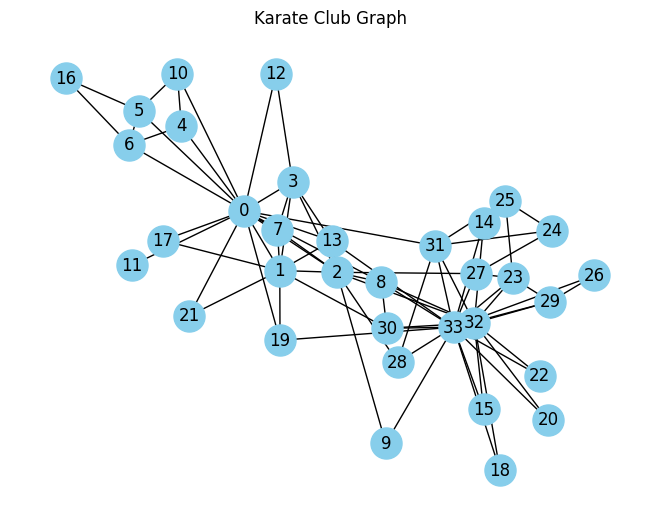

In [42]:
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
plt.title("Karate Club Graph")
plt.show()

In [43]:
# Convert 'club' labels to integers
club_labels = {node: 0 if G.nodes[node]['club'] == 'Mr. Hi' else 1 for node in G.nodes}
y = torch.tensor([club_labels[node] for node in G.nodes], dtype=torch.long)

# Data preparation
edge_index = torch.tensor(list(G.edges)).t().contiguous()
data = Data(edge_index=edge_index, y=y)

## GCN Model

In [44]:
# Define the GCN model
class GCN(nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [45]:
# Initialize the model, criterion, and optimizer
model = GCN(1, 2)  # Num of features: 1, Num of classes: 2
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training
def train():
    model.train()
    optimizer.zero_grad()
    output = model(torch.ones(len(G.nodes), 1), data.edge_index)  # Placeholder feature
    loss = criterion(output, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    train()

In [46]:
# Testing
model.eval()
with torch.no_grad():
    output = model(torch.ones(len(G.nodes), 1), data.edge_index)  # Placeholder feature
    predicted_labels = output.argmax(dim=1)

# Calculate the testing accuracy
test_accuracy = accuracy_score(data.y, predicted_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7647


## Applying Feature Engineering

In [47]:
# Create network-based features using degree centrality
degree_centrality = nx.degree_centrality(G)
x = torch.tensor([degree_centrality[node] for node in G.nodes()], dtype=torch.float).view(-1, 1)

In [48]:
# Initialize the model, criterion, and optimizer
model = GCN(data.num_features, 2)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [49]:
# Training
def train():
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = criterion(output, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    train()

AttributeError: 'NoneType' object has no attribute 'size'

In [ ]:
# Testing
model.eval()
with torch.no_grad():
    output = model(data.x, data.edge_index)
    predicted_labels = output.argmax(dim=1)

# Calculate the testing accuracy
test_accuracy = accuracy_score(data.y, predicted_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9412
